In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
import math
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("data/origin_data.csv",parse_dates=[0])
dataset = df.values

In [6]:
df['month'] = ''

In [7]:
df

,timestamp,Office_Marla,Office_Maryann,Office_Myron,Office_Mick,Office_Moises,Office_Marcus,Office_Marc,Office_Mary,Office_Monty,...,Office_Madisyn,Office_Morgan,Office_Marion,Office_Martin,Office_Muhammad,Office_Mikayla,Office_Mason,Office_Marcia,Office_Milton,month
0,2014-06-02 00:00:00,10.50,4.654300,30.50,26.25,21.75,20.75,14.25,17.75,37.25,...,41.00,22.25,112.25,38.50,127.50,189.25,89.75,287.00,685.75,
1,2014-06-02 01:00:00,8.25,4.003900,29.25,26.25,13.75,23.50,14.25,18.50,36.00,...,41.50,20.25,114.25,34.25,132.00,196.25,96.00,288.50,664.75,
2,2014-06-02 02:00:00,9.00,4.483375,34.00,26.00,16.00,24.75,15.75,16.00,38.00,...,40.50,19.50,115.50,33.00,130.50,190.50,93.50,266.50,664.75,
3,2014-06-02 03:00:00,9.00,4.418925,30.25,26.25,12.25,20.75,14.50,17.75,35.75,...,40.50,19.75,113.00,32.00,131.25,176.75,88.75,254.50,673.50,
4,2014-06-02 04:00:00,9.25,3.978525,36.00,26.75,15.25,25.50,13.75,18.50,35.75,...,41.50,19.50,105.75,32.25,128.25,173.25,87.25,252.75,671.50,
5,2014-06-02 05:00:00,10.25,4.435575,40.50,27.00,16.00,25.25,14.00,18.75,37.75,...,37.25,19.50,105.75,31.75,129.75,172.25,88.00,251.50,678.25,
6,2014-06-02 06:00:00,9.00,4.362275,34.75,26.75,14.75,23.75,14.50,17.50,35.75,...,38.50,20.00,108.00,32.25,125.75,174.75,88.00,254.50,665.75,
7,2014-06-02 07:00:00,12.00,4.125000,33.25,25.75,15.25,23.00,14.25,17.25,36.25,...,39.50,19.25,108.25,33.75,122.00,170.75,88.25,255.00,667.25,
8,2014-06-02 08:00:00,10.50,4.503900,34.50,26.75,16.50,25.50,13.75,20.00,36.00,...,40.00,19.75,109.25,32.75,122.00,172.75,87.25,234.75,670.25,
9,2014-06-02 09:00:00,9.50,3.960950,32.50,27.00,17.50,24.75,14.50,16.00,37.00,...,37.50,19.00,109.00,35.25,122.00,171.75,89.00,270.25,662.75,


In [8]:
for i in range(len(df)):
    df['month'][i] = df['timestamp'][i].month

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df

,timestamp,Office_Marla,Office_Maryann,Office_Myron,Office_Mick,Office_Moises,Office_Marcus,Office_Marc,Office_Mary,Office_Monty,...,Office_Madisyn,Office_Morgan,Office_Marion,Office_Martin,Office_Muhammad,Office_Mikayla,Office_Mason,Office_Marcia,Office_Milton,month
0,2014-06-02 00:00:00,10.50,4.654300,30.50,26.25,21.75,20.75,14.25,17.75,37.25,...,41.00,22.25,112.25,38.50,127.50,189.25,89.75,287.00,685.75,6
1,2014-06-02 01:00:00,8.25,4.003900,29.25,26.25,13.75,23.50,14.25,18.50,36.00,...,41.50,20.25,114.25,34.25,132.00,196.25,96.00,288.50,664.75,6
2,2014-06-02 02:00:00,9.00,4.483375,34.00,26.00,16.00,24.75,15.75,16.00,38.00,...,40.50,19.50,115.50,33.00,130.50,190.50,93.50,266.50,664.75,6
3,2014-06-02 03:00:00,9.00,4.418925,30.25,26.25,12.25,20.75,14.50,17.75,35.75,...,40.50,19.75,113.00,32.00,131.25,176.75,88.75,254.50,673.50,6
4,2014-06-02 04:00:00,9.25,3.978525,36.00,26.75,15.25,25.50,13.75,18.50,35.75,...,41.50,19.50,105.75,32.25,128.25,173.25,87.25,252.75,671.50,6
5,2014-06-02 05:00:00,10.25,4.435575,40.50,27.00,16.00,25.25,14.00,18.75,37.75,...,37.25,19.50,105.75,31.75,129.75,172.25,88.00,251.50,678.25,6
6,2014-06-02 06:00:00,9.00,4.362275,34.75,26.75,14.75,23.75,14.50,17.50,35.75,...,38.50,20.00,108.00,32.25,125.75,174.75,88.00,254.50,665.75,6
7,2014-06-02 07:00:00,12.00,4.125000,33.25,25.75,15.25,23.00,14.25,17.25,36.25,...,39.50,19.25,108.25,33.75,122.00,170.75,88.25,255.00,667.25,6
8,2014-06-02 08:00:00,10.50,4.503900,34.50,26.75,16.50,25.50,13.75,20.00,36.00,...,40.00,19.75,109.25,32.75,122.00,172.75,87.25,234.75,670.25,6
9,2014-06-02 09:00:00,9.50,3.960950,32.50,27.00,17.50,24.75,14.50,16.00,37.00,...,37.50,19.00,109.00,35.25,122.00,171.75,89.00,270.25,662.75,6


In [10]:
df.to_csv("C:\\Users\\Administrator\\Desktop\\大三上课程\\深度学习技术\\homeWork\\data_with_month.csv")

In [97]:
hours = df['hour']
df_x = df.drop(['hour'], axis=1)

In [98]:
hours

0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
10      10
11      11
12      12
13      13
14      14
15      15
16      16
17      17
18      18
19      19
20      20
21      21
22      22
23      23
24       0
25       1
26       2
27       3
28       4
29       5
        ..
2058    18
2059    19
2060    20
2061    21
2062    22
2063    23
2064     0
2065     1
2066     2
2067     3
2068     4
2069     5
2070     6
2071     7
2072     8
2073     9
2074    10
2075    11
2076    12
2077    13
2078    14
2079    15
2080    16
2081    17
2082    18
2083    19
2084    20
2085    21
2086    22
2087    23
Name: hour, Length: 2088, dtype: int64

In [99]:
df_x

,Office_Marla,Office_Maryann,Office_Myron,Office_Mick,Office_Moises,Office_Marcus,Office_Marc,Office_Mary,Office_Monty,Office_Marlon,...,Office_Megan,Office_Madisyn,Office_Morgan,Office_Marion,Office_Martin,Office_Muhammad,Office_Mikayla,Office_Mason,Office_Marcia,Office_Milton
0,10.50,4.654300,30.50,26.25,21.75,20.75,14.25,17.75,37.25,6.00,...,66.75,41.00,22.25,112.25,38.50,127.50,189.25,89.75,287.00,685.75
1,8.25,4.003900,29.25,26.25,13.75,23.50,14.25,18.50,36.00,10.75,...,67.75,41.50,20.25,114.25,34.25,132.00,196.25,96.00,288.50,664.75
2,9.00,4.483375,34.00,26.00,16.00,24.75,15.75,16.00,38.00,7.50,...,68.75,40.50,19.50,115.50,33.00,130.50,190.50,93.50,266.50,664.75
3,9.00,4.418925,30.25,26.25,12.25,20.75,14.50,17.75,35.75,8.50,...,72.25,40.50,19.75,113.00,32.00,131.25,176.75,88.75,254.50,673.50
4,9.25,3.978525,36.00,26.75,15.25,25.50,13.75,18.50,35.75,8.25,...,69.50,41.50,19.50,105.75,32.25,128.25,173.25,87.25,252.75,671.50
5,10.25,4.435575,40.50,27.00,16.00,25.25,14.00,18.75,37.75,11.25,...,66.50,37.25,19.50,105.75,31.75,129.75,172.25,88.00,251.50,678.25
6,9.00,4.362275,34.75,26.75,14.75,23.75,14.50,17.50,35.75,7.50,...,68.75,38.50,20.00,108.00,32.25,125.75,174.75,88.00,254.50,665.75
7,12.00,4.125000,33.25,25.75,15.25,23.00,14.25,17.25,36.25,11.75,...,72.00,39.50,19.25,108.25,33.75,122.00,170.75,88.25,255.00,667.25
8,10.50,4.503900,34.50,26.75,16.50,25.50,13.75,20.00,36.00,7.75,...,72.00,40.00,19.75,109.25,32.75,122.00,172.75,87.25,234.75,670.25
9,9.50,3.960950,32.50,27.00,17.50,24.75,14.50,16.00,37.00,8.50,...,72.00,37.50,19.00,109.00,35.25,122.00,171.75,89.00,270.25,662.75


In [106]:
xx = pd.DataFrame({ 'x' :x, 'hour' :hours})
xx

,hour,x
0,0,73.651392
1,1,73.429587
2,2,72.897010
3,3,72.350485
4,4,72.653296
5,5,72.267579
6,6,71.650315
7,7,71.227564
8,8,70.955228
9,9,72.434896


In [109]:
res = []

In [110]:
for i in range(24):
    res.append(xx['x'][xx['hour']==i].mean())

In [112]:
y = np.arange(24)
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [111]:
res

[88.63073715001474,
 85.25185535661657,
 82.529189294135,
 78.66674442970822,
 76.02557575891542,
 73.98038185971114,
 72.84852782935458,
 71.76930906277632,
 71.56537482316533,
 71.51735493663425,
 75.37997675361036,
 87.92105503978776,
 99.17327950191572,
 111.43858471117004,
 119.55314209401709,
 124.75840356616563,
 126.44197744621283,
 126.36259326554669,
 126.95426903183025,
 126.7269047597996,
 124.1910799955792,
 118.66437314323606,
 108.45272102858831,
 97.82394453286177]

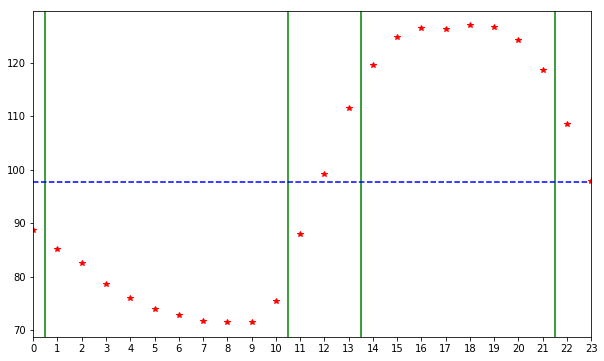

In [142]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=(10, 6))
ax=plt.gca()
x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,23)
plt.axvline(0.5, color='g')
plt.axvline(10.5, color='g')
plt.axvline(13.5, color='g')
plt.axvline(21.5, color='g')
plt.axhline(np.array(res).mean(), color='blue', linestyle='--')
plt.plot(y, res,'r*')

In [71]:
# df.to_csv("C:\\Users\\Administrator\\Desktop\\大三上课程\\深度学习技术\\homeWork\\dataset_with_hours.csv")

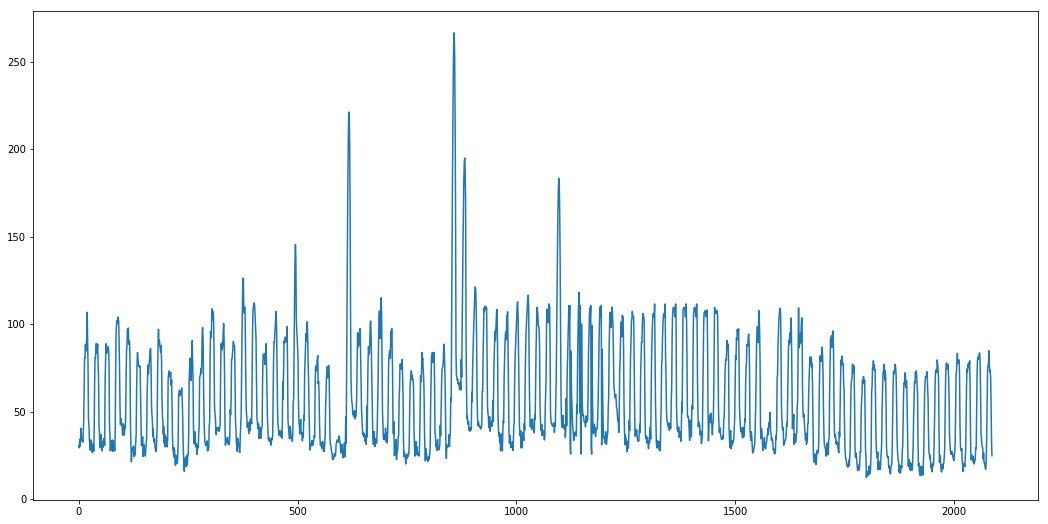

In [28]:
plt.figure(figsize=(18, 9))
plt.plot(dataset)
plt.show()

In [29]:
#归一化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.7)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

In [30]:
def create_dataset(dataset, look_back, out_num):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back - out_num + 1):
        a = dataset[i:(i+look_back)]
        b = dataset[(i+look_back):(i+look_back+out_num)]
        dataX.append(a)
        dataY.append(b)
    return np.array(dataX),np.array(dataY)

In [31]:
# 用前3个预测后3个
look_back = 3
out_num = 3
trainX,trainY  = create_dataset(trainlist,look_back, out_num)
testX,testY = create_dataset(testlist,look_back, out_num)

In [32]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

In [33]:
# 载入模型
model = load_model("C:\\Users\\Administrator\\Desktop\\大三上课程\\深度学习技术\\homeWork\\lstm_0.h5")

In [16]:
n_steps_in, n_steps_out = look_back, out_num
n_features = 1

# define model【Vanilla LSTM】
model = Sequential()
model.add(LSTM(4, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(4, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1456/1456 - 3s - loss: 0.0285
Epoch 2/100
1456/1456 - 2s - loss: 0.0207
Epoch 3/100
1456/1456 - 2s - loss: 0.0199
Epoch 4/100
1456/1456 - 3s - loss: 0.0198
Epoch 5/100
1456/1456 - 3s - loss: 0.0194
Epoch 6/100
1456/1456 - 3s - loss: 0.0191
Epoch 7/100
1456/1456 - 3s - loss: 0.0186
Epoch 8/100
1456/1456 - 3s - loss: 0.0180
Epoch 9/100
1456/1456 - 3s - loss: 0.0173
Epoch 10/100
1456/1456 - 3s - loss: 0.0168
Epoch 11/100
1456/1456 - 3s - loss: 0.0166
Epoch 12/100
1456/1456 - 3s - loss: 0.0165
Epoch 13/100
1456/1456 - 2s - loss: 0.0164
Epoch 14/100
1456/1456 - 3s - loss: 0.0165
Epoch 15/100
1456/1456 - 3s - loss: 0.0164
Epoch 16/100
1456/1456 - 3s - loss: 0.0164
Epoch 17/100
1456/1456 - 3s - loss: 0.0163
Epoch 18/100
1456/1456 - 3s - loss: 0.0163
Epoch 19/100
1456/1456 - 3s - loss: 0.0163
Epoch 20/100
1456/1456 - 3s - loss: 0.0163
Epoch 21/100
1456/1456 - 3s - loss: 0.0162
Epoch 22/100
1456/1456 - 3s - loss: 0.0162
Epoch 23/100
1456/1456 - 3s - loss: 0.0162
Epoch 24/100
1456/14

In [20]:
# model.save("C:\\Users\\Administrator\\Desktop\\大三上课程\\深度学习技术\\homeWork\\lstm_0.h5")

In [10]:
# model = load_model("C:\\Users\\Administrator\\Desktop\\大三上课程\\深度学习技术\\homeWork\\lstm_0.h5")

In [34]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [35]:
#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY.reshape(trainY.shape[0], trainY.shape[1]))
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(testY.shape[0], testY.shape[1]))

In [36]:
trainPredict

array([[ 76.972855, 105.00172 , 127.71375 ],
       [ 76.52366 , 104.44354 , 127.03181 ],
       [ 77.6357  , 105.43048 , 127.98497 ],
       ...,
       [112.35652 , 117.372444, 122.471176],
       [113.05238 , 118.62114 , 124.200066],
       [111.95914 , 117.566536, 123.13002 ]], dtype=float32)

In [37]:
trainY

array([[ 30.25,  36.  ,  40.5 ],
       [ 36.  ,  40.5 ,  34.75],
       [ 40.5 ,  34.75,  33.25],
       ...,
       [107.75, 106.  , 107.75],
       [106.  , 107.75, 106.25],
       [107.75, 106.25, 104.75]])

In [38]:
def convert(a):
    a1 = np.array([a[:, 0][0]])
    a2 = np.array([(a[:, 0][1] + a[:, 1][0]) / 2])
    a3 = (a[:, 0][2: ] + a[:, 1][1: -1] + a[:, 2][0: -2]) / 3
    a4 = np.array([(a[:, 1][-1] + a[:, 2][-2]) / 2])
    a5 = np.array([a[:, 2][-1]])
    a_last = np.concatenate([a1,a2,a3,a4,a5])
    return a_last

In [39]:
trainPredict = convert(trainPredict)
testPredict = convert(testPredict)
trainY = convert(trainY)
testY = convert(testY)

In [41]:
trainY

array([ 30.25,  36.  ,  40.5 , ..., 107.75, 106.25, 104.75])

In [18]:
predict = np.append(trainPredict, testPredict)
y = np.append(trainY, testY)

In [18]:
# 求均方误差(1)  所有一起
trainScore = math.sqrt(mean_squared_error(trainY.flatten(), trainPredict.flatten()))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY.flatten(), testPredict.flatten()))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 1.136 RMSE
Test Score: 1.074 RMSE


In [17]:
trainScore1 = mean_squared_error(trainY.flatten(), trainPredict.flatten())
print('Train Score: %.3f MSE' % (trainScore1))
testScore1 = mean_squared_error(testY.flatten(), testPredict.flatten())
print('Test Score: %.3f MSE' % (testScore1))

Train Score: 1.291 MSE
Test Score: 1.154 MSE


In [20]:
# 求均方误差(2)  使用最终的均值结果
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 1.136 RMSE
Test Score: 1.074 RMSE


## 所有数据

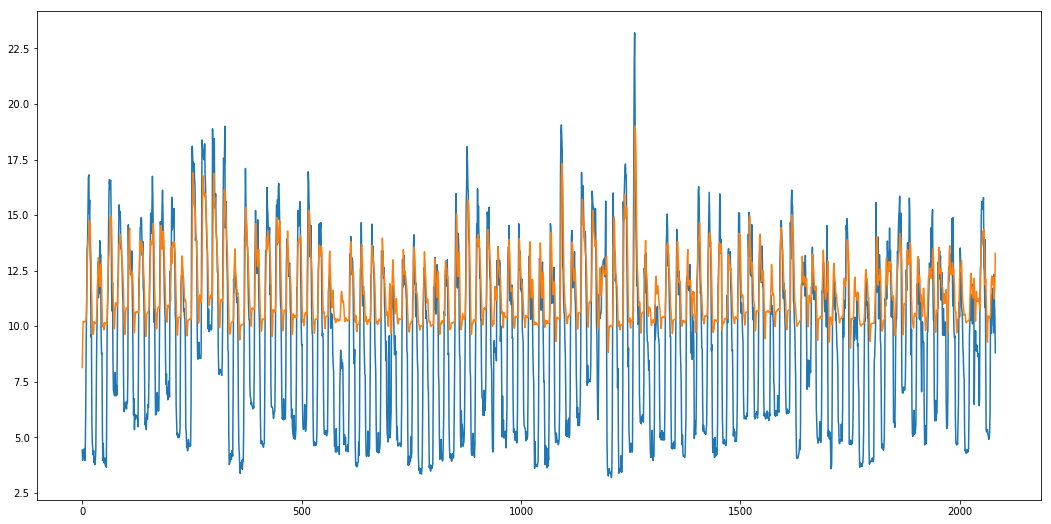

In [21]:
plt.figure(figsize=(18, 9))
plt.plot(y)
plt.plot(predict)
plt.show()

## 训练集

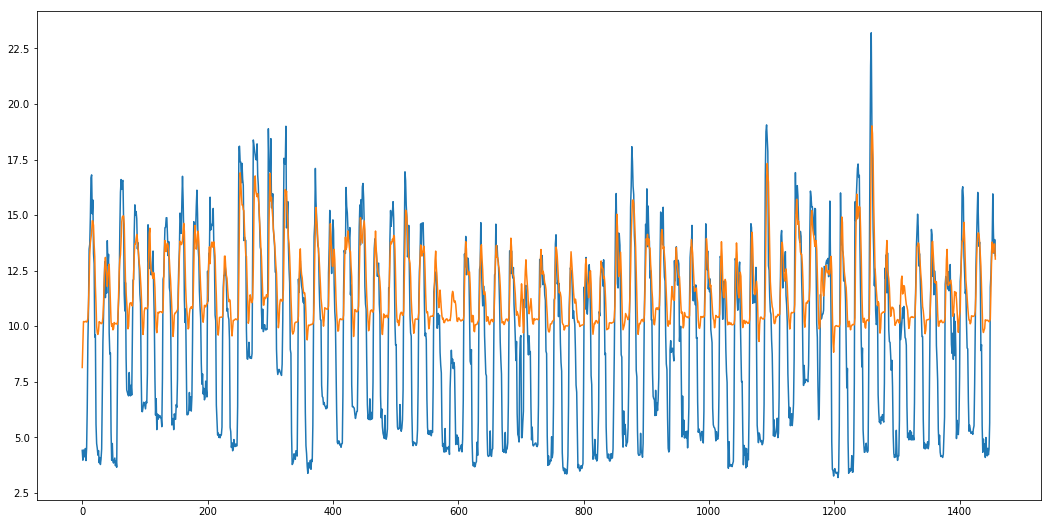

In [22]:
plt.figure(figsize=(18, 9))
plt.plot(trainY)
plt.plot(trainPredict)
plt.show()

## 测试集

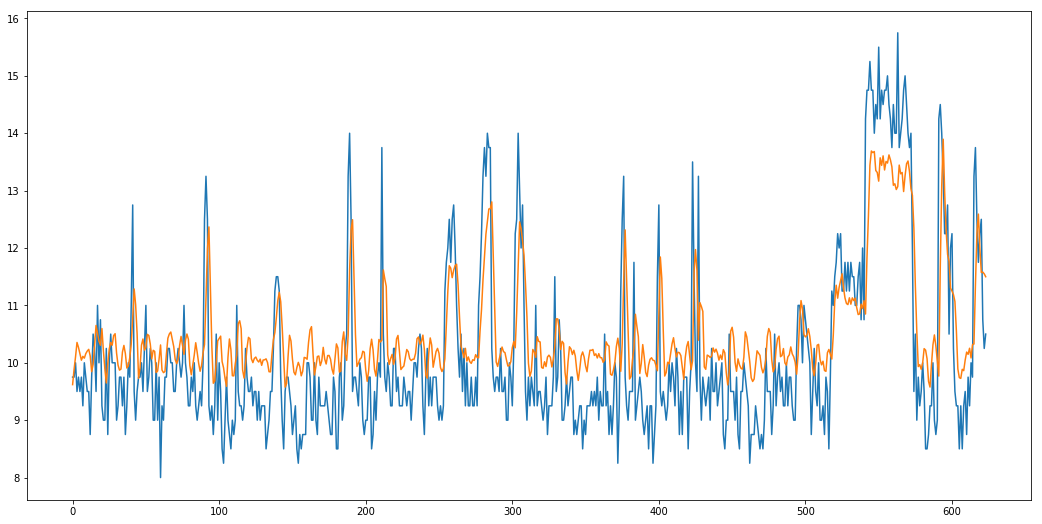

In [23]:
plt.figure(figsize=(18, 9))
plt.plot(testY)
plt.plot(testPredict)
plt.show()

## 前200条数据 （训练集）

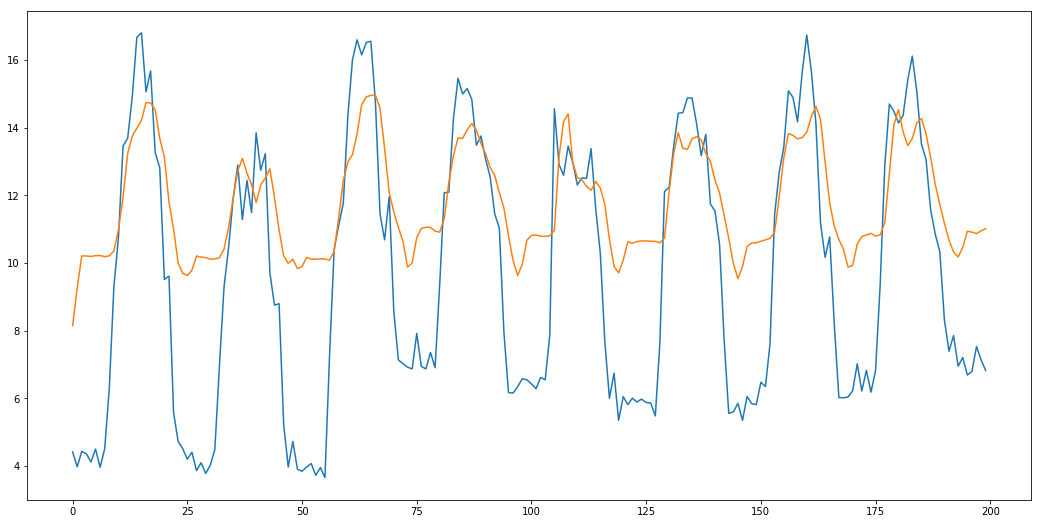

In [23]:
plt.figure(figsize=(18, 9))
plt.plot(y[:200])
plt.plot(predict[:200])
plt.show()

## 后200条数据 （测试集）

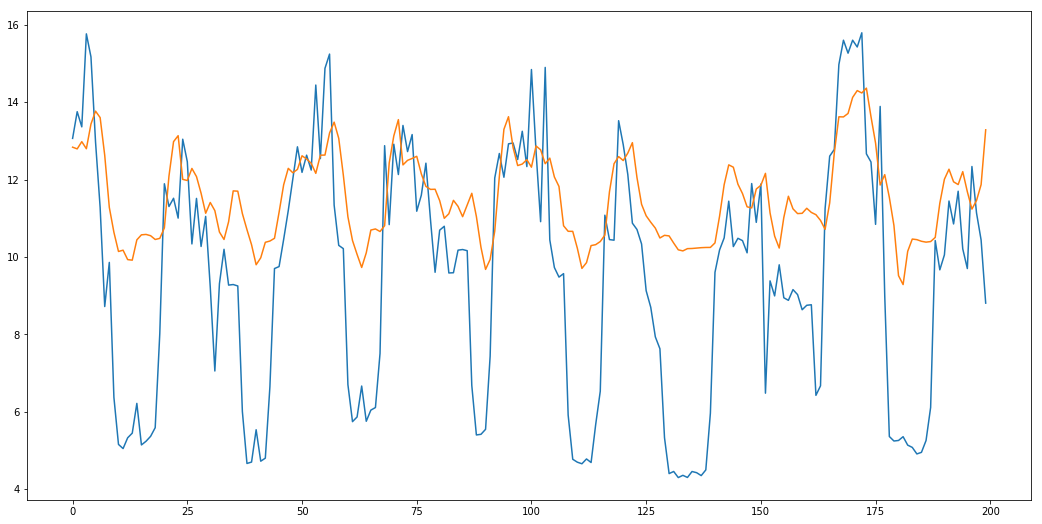

In [24]:
plt.figure(figsize=(18, 9))
plt.plot(y[-200:])
plt.plot(predict[-200:])
plt.show()

## 总体结果 

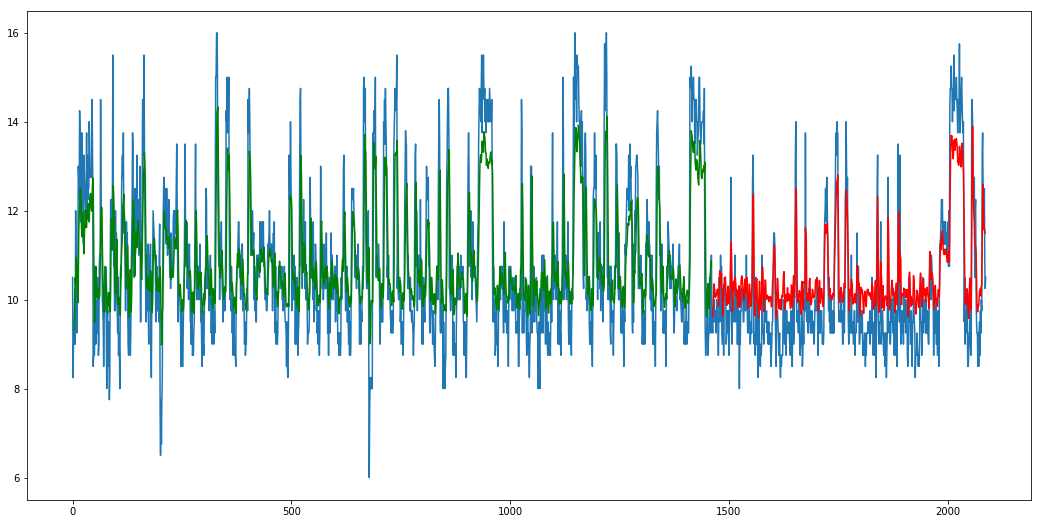

In [26]:
plt.figure(figsize=(18, 9))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredict = np.expand_dims(trainPredict, axis=1)
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredict = np.expand_dims(testPredict, axis=1)
testPredictPlot[len(trainPredict)+(look_back*2)-1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,'g')
plt.plot(testPredictPlot,'r')
plt.show()